In [12]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import preprocessing_functions
import feature_engineering_functions
import pycaret
#from pycaret.classification import *
from scipy.stats import pearsonr
from dataprep.eda import create_report
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [13]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)

In [14]:
sema=pd.read_pickle('data/semas_read_from_the_base_experiment_dates.pkl')
sema = sema.sort_values(by='date', ascending=True)
sema=preprocessing_functions.sema_basic_preprocessing(sema)

In [15]:
# merge fitbit and sema
data = pd.merge(fitbit, sema, on=['date','id'], how='inner')
data = data.drop(columns=['positive_feelings'])

In [16]:
df = preprocessing_functions.post_preprocessing(data)
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e301e67b776a240608a72,34.710232,61.6455,36.408,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
1,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
2,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
3,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
4,621e2f3967b776a240c654db,33.980583,69.8200,28.594,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,0.0,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,621e366567b776a24076a727,33.277004,46.6970,62.157,13.0,76.0,0.633333,0.825,0.800000,-2.266232,...,0.0,1,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869
4941,621e346f67b776a24081744f,32.903545,71.8630,25.475,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4942,621e331067b776a24085dd3f,33.980583,61.6455,36.408,14.4,76.0,0.766667,0.725,0.766667,-1.404268,...,0.0,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4943,621e2f9167b776a240011ccb,34.716690,58.4890,28.329,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139


# Adds wear_day

In [17]:
df['wear_day'] = df.apply(feature_engineering_functions.f, axis=1)
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day
0,621e301e67b776a240608a72,34.710232,61.6455,36.408,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
1,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
2,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
3,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
4,621e2f3967b776a240c654db,33.980583,69.8200,28.594,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,621e366567b776a24076a727,33.277004,46.6970,62.157,13.0,76.0,0.633333,0.825,0.800000,-2.266232,...,1,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1
4941,621e346f67b776a24081744f,32.903545,71.8630,25.475,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1
4942,621e331067b776a24085dd3f,33.980583,61.6455,36.408,14.4,76.0,0.766667,0.725,0.766667,-1.404268,...,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1
4943,621e2f9167b776a240011ccb,34.716690,58.4890,28.329,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1


# Adds stress_quantile

In [18]:
df["stress_quantile"] = pd.qcut(df["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=["low", "medium", "high"])
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day,stress_quantile
0,621e301e67b776a240608a72,34.710232,61.6455,36.408,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
1,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
2,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
3,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
4,621e2f3967b776a240c654db,33.980583,69.8200,28.594,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,621e366567b776a24076a727,33.277004,46.6970,62.157,13.0,76.0,0.633333,0.825,0.800000,-2.266232,...,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1,high
4941,621e346f67b776a24081744f,32.903545,71.8630,25.475,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,low
4942,621e331067b776a24085dd3f,33.980583,61.6455,36.408,14.4,76.0,0.766667,0.725,0.766667,-1.404268,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,high
4943,621e2f9167b776a240011ccb,34.716690,58.4890,28.329,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,high


<AxesSubplot: xlabel='count', ylabel='stress_quantile'>

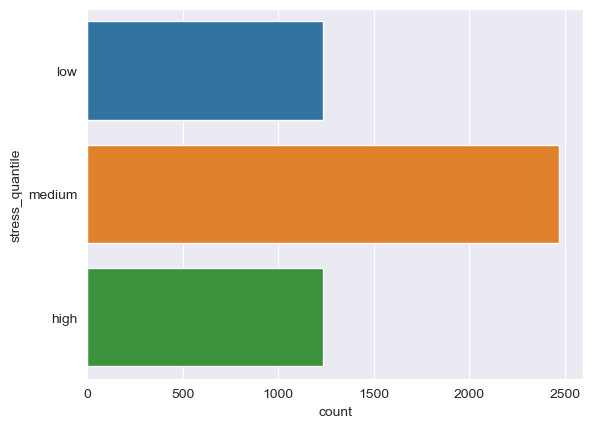

In [19]:
sns.countplot(y="stress_quantile", data=df)

In [20]:
df['stress_quantile'].replace(to_replace=['low', 'medium', 'high'], value=[0, 1, 2], inplace=True)
df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,wear_day,stress_quantile
0,621e301e67b776a240608a72,34.710232,61.6455,36.408,14.4,74.0,0.700000,0.700,0.833333,-1.822489,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
1,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
2,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
3,621e362467b776a2404ad513,34.526732,67.1180,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
4,621e2f3967b776a240c654db,33.980583,69.8200,28.594,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,621e366567b776a24076a727,33.277004,46.6970,62.157,13.0,76.0,0.633333,0.825,0.800000,-2.266232,...,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1,2
4941,621e346f67b776a24081744f,32.903545,71.8630,25.475,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,0
4942,621e331067b776a24085dd3f,33.980583,61.6455,36.408,14.4,76.0,0.766667,0.725,0.766667,-1.404268,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,2
4943,621e2f9167b776a240011ccb,34.716690,58.4890,28.329,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1,2


<AxesSubplot: xlabel='count', ylabel='stress_quantile'>

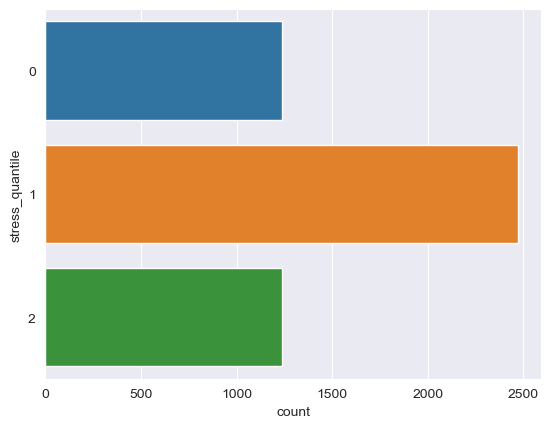

In [21]:
sns.countplot(y="stress_quantile", data=df)

# Adds sleep duration average values for each user

In [22]:
df['sleep_repetition'] = df['id'].map(df.groupby('id')['sleep_duration'].unique())
df['average_sleep_duration']=pd.DataFrame(df['sleep_repetition'].values.tolist()).mean(1)
df = df.drop(columns=['sleep_repetition'])